In [167]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
covid19_csv = pd.read_csv('time_series_covid19_confirmed_global_820.csv')
covid19_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,101,101,101,106,107,107,107,107,108,111
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,736609,751001,765002,779689,790818,798486,809728,824468,840915,856369
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,49901,50359,50850,51382,51925,52496,52677,53083,53755,54473
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,4224,4227,4231,4232,4234,4235,4246,4249,4261,4271


In [10]:
covid19_csv.shape

(266, 265)

## Drop the conlums

In [14]:
df = covid19_csv.drop(['Lat','Long'],axis =1,inplace = True)

## Aggegating the rows by country

In [178]:
covid_agg = covid19_csv.groupby('Country/Region').sum()

In [179]:
covid_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39254,39268,39285,39290,39297,39341,39422,39486,39548,39616
Albania,0,0,0,0,0,0,0,0,0,0,...,13518,13649,13806,13965,14117,14266,14410,14568,14730,14899
Algeria,0,0,0,0,0,0,0,0,0,0,...,51368,51530,51690,51847,51995,52136,52270,52399,52520,52658
Andorra,0,0,0,0,0,0,0,0,0,0,...,1966,2050,2050,2110,2110,2110,2370,2370,2568,2568
Angola,0,0,0,0,0,0,0,0,0,0,...,4905,4972,5114,5211,5370,5402,5530,5725,5725,5958


In [180]:
covid_agg.shape

(188, 261)

## Visualizing data related to countries

In [181]:
covid_agg.loc['China']

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
           ...  
10/4/20    90629
10/5/20    90652
10/6/20    90667
10/7/20    90687
10/8/20    90728
Name: China, Length: 261, dtype: int64

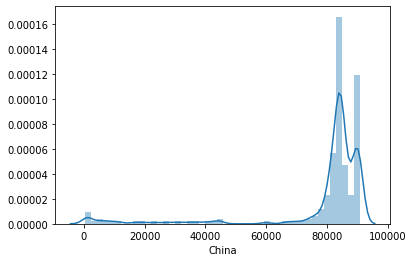

In [182]:
sns.distplot(covid_agg.loc['China'])

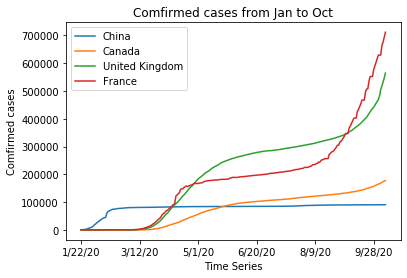

In [183]:
covid_agg.loc['China'].plot()
covid_agg.loc['Canada'].plot()
covid_agg.loc['United Kingdom'].plot()
covid_agg.loc['France'].plot()
plt.xlabel('Time Series')
plt.ylabel('Comfirmed cases')
plt.title('Comfirmed cases from Jan to Oct')
plt.legend()

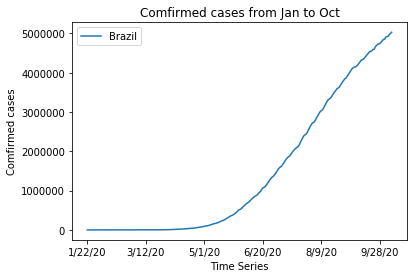

In [184]:
covid_agg.loc['Brazil'].plot()
plt.xlabel('Time Series')
plt.ylabel('Comfirmed cases')
plt.title('Comfirmed cases from Jan to Oct')
plt.legend()

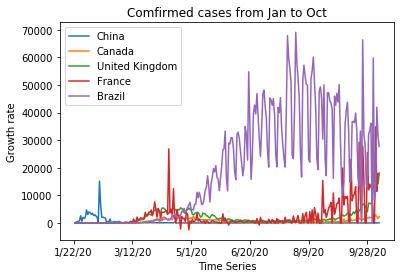

In [185]:
Countries = ['China','Canada','United Kingdom','France','Brazil']
for i in Countries:
    covid_agg.loc[i].diff().plot()
plt.xlabel('Time Series')
plt.ylabel('Growth rate')
plt.title('Comfirmed cases from Jan to Oct')
plt.legend()

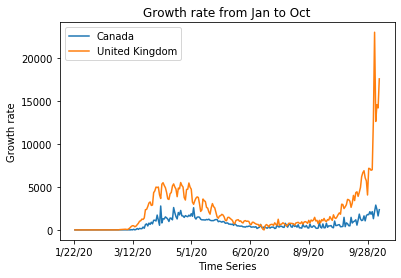

In [186]:
covid_agg.loc['Canada'].diff().plot()
covid_agg.loc['United Kingdom'].diff().plot()
plt.xlabel('Time Series')
plt.ylabel('Growth rate')
plt.title('Growth rate from Jan to Oct')
plt.legend()

## Find maxmimum infection rate for countries of interest

In [64]:
Countries = ['China','Canada','United Kingdom','France','Brazil']
for i in Countries:
    x = covid_agg.loc[i].diff().max()
    print(x)

15136.0
2883.0
22965.0
34780.0
69074.0


## Find maximun infection rate for all the countries

In [69]:
countries = list(covid_agg.index)
max_infection_rates = []
for country in countries:
    max_infection_rates.append(covid_agg.loc[country].diff().max())
covid_agg['max_infection_rates'] = max_infection_rates

In [70]:
covid_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39268,39285,39290,39297,39341,39422,39486,39548,39616,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,13649,13806,13965,14117,14266,14410,14568,14730,14899,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,51530,51690,51847,51995,52136,52270,52399,52520,52658,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,2050,2050,2110,2110,2110,2370,2370,2568,2568,260.0
Angola,0,0,0,0,0,0,0,0,0,0,...,4972,5114,5211,5370,5402,5530,5725,5725,5958,233.0


# Importing the world happiness report

In [150]:
world_happiness_report = pd.read_csv('worldwide_happiness_report.csv')
world_happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## Droping the columns

In [149]:
# columns_to_drop = ['Score','Overall rank','Score','Generosity','Perceptions of corruption']
# world_happiness_report.drop(columns_to_drop, axis = 1, inplace = True )

In [151]:
world_happiness_report.set_index('Country or region',inplace = True)
world_happiness_report

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


## Join world happiness report dataset with confirm cases above

In [152]:
data_max_infection = pd.DataFrame(covid_agg['max_infection_rates'])
data_max_infection 

,max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,178.0
Algeria,675.0
Andorra,260.0
Angola,233.0
...,...
West Bank and Gaza,888.0
Western Sahara,4.0
Yemen,116.0


In [153]:
data = pd.merge(world_happiness_report, data_max_infection, left_index=True, right_index=True)
data.index.name='Country or region'
data

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,max_infection_rates
Country or region,,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,296.0
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,823.0
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,386.0
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,101.0
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,9155.0
...,...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,231.0
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147,181.0
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,915.0


## Correlation Matrix

In [154]:
df = data.corr()
df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,max_infection_rates
Overall rank,1.000000,-0.989127,-0.803665,-0.776393,-0.806767,-0.568654,-0.070804,-0.388395,-0.121914
Score,-0.989127,1.000000,0.795413,0.784094,0.801891,0.585119,0.097775,0.419293,0.107266
GDP per capita,-0.803665,0.795413,1.000000,0.757521,0.859431,0.394799,-0.097441,0.311759,0.125826
Social support,-0.776393,0.784094,0.757521,1.000000,0.751632,0.456317,-0.060586,0.203333,0.077558
Healthy life expectancy,-0.806767,0.801891,0.859431,0.751632,1.000000,0.423146,-0.052984,0.311566,0.126077
Freedom to make life choices,-0.568654,0.585119,0.394799,0.456317,0.423146,1.000000,0.259240,0.446845,0.092682
Generosity,-0.070804,0.097775,-0.097441,-0.060586,-0.052984,0.259240,1.000000,0.326430,-0.093043
Perceptions of corruption,-0.388395,0.419293,0.311759,0.203333,0.311566,0.446845,0.326430,1.000000,-0.041859
max_infection_rates,-0.121914,0.107266,0.125826,0.077558,0.126077,0.092682,-0.093043,-0.041859,1.000000


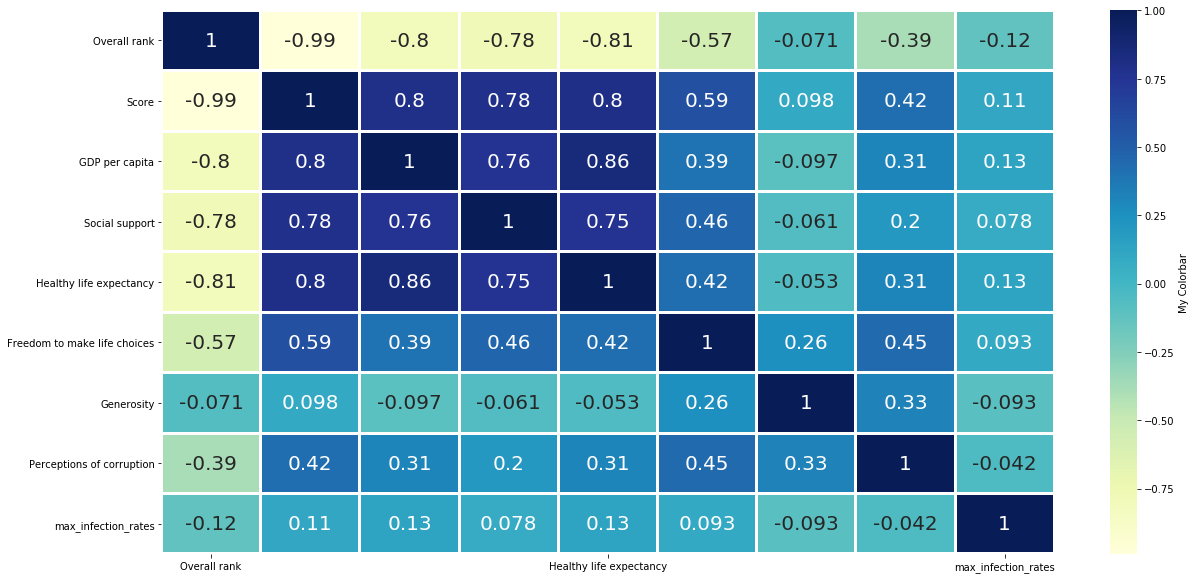

In [159]:
plt.figure(figsize=(20,10))
sns.heatmap(df,cmap="YlGnBu", annot = True,annot_kws={"size": 20}, cbar_kws={'label': 'My Colorbar'}, linewidths=2, xticklabels=4)

## Plotting GDP VS  maximum infection rate

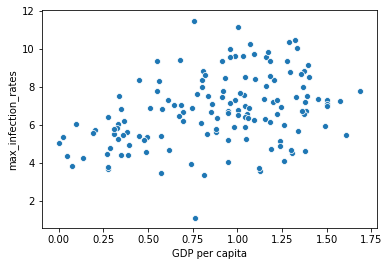

In [160]:
x = data['GDP per capita']
y = data['max_infection_rates']
sns.scatterplot(x,np.log(y))

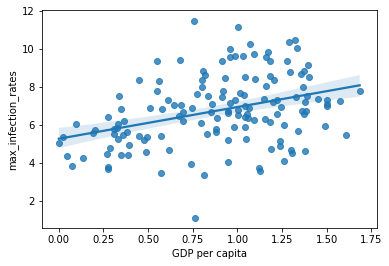

In [161]:
sns.regplot(x, np.log(y))

## Plotting Social support vs maximum Infection rate

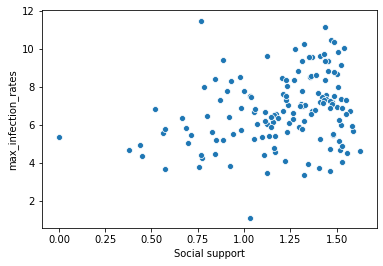

In [163]:
x = data['Social support']
y = data['max_infection_rates']
sns.scatterplot(x,np.log(y))

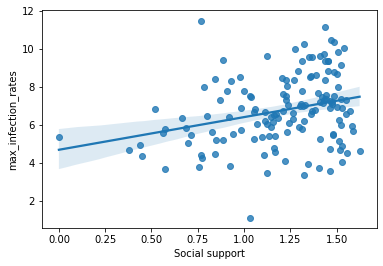

In [170]:
sns.regplot(x = x ,y = np.log(y))